[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)


### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)


In [7]:
!nvidia-smi --query-gpu=name, memory.total, memory.free --format=csv, noheader

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
ERROR: Option memory.total, is not recognized. Please run 'nvidia-smi -h' for help.



In [8]:
# !update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
# !update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
# !sudo apt install python3.8

!apt-get install python3.8-distutils
!python --version
!apt-get update
!apt install software-properties-common

# !sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https: // github.com/Winfredy/SadTalker & > /dev/null
%cd SadTalker
!export PYTHONPATH= /content/SadTalker:$PYTHONPATH
# %pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg & > /dev/null
%pip install -r requirements.txt

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Python 3.11.7
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-front

Download models (1 mins)


In [9]:
import os

if not os.path.exists('checkpoints'):
    print('Download pre-trained models...')
    !rm -rf checkpoints
    !bash scripts/download_models.sh
else:
    print('Pre-trained models already exist.')

Download pre-trained models...
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2024-02-15 02:48:02--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... No data received.
Retrying.

--2024-02-15 02:48:14--  (try: 2)  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=AKIAVCO

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

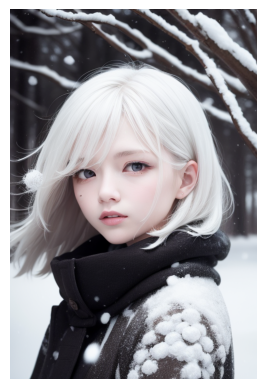

In [10]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt

print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')


def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()


default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation


In [26]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
audio = 'examples/driven_audio/Recording.m4a'
result = './results'
print(img)
!pwd
!python inference.py --driven_audio {audio} \
    --source_image {img} \
    --result_dir {result} --still --preprocess full --enhancer gfpgan

examples/source_image/full3.png
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/mnt/d/OneDrive - Cairo University - Students/Development/graduation_project/Artificial Intelligence/SadTalker
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
using safetensor as default
3DMM Extraction for source image
Face Renderer:: 100%|███████████████████████████| 53/53 [00:54<00:00,  1.03s/it]
Traceback (most recent call last):
  File "/mnt/d/OneDrive - Cairo University - Students/Development/graduation_project/Artificial Intelligence/SadTalker/inference.py", line 144, in <module>
    main(args)
  File "/mnt/d/OneDrive - Cairo University - Students/Development/graduation_project/Artificial Intelligence/SadTalker/inference.py", line 87, in main
    result = animate_from_coeff.generate(data, save_dir, pic_path, crop_info, \
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/d/OneDrive - Cairo University - Stude

In [27]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name), 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


IndexError: list index out of range